In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data\GL-06-50_baseline_drift

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-50_baseline_drift


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

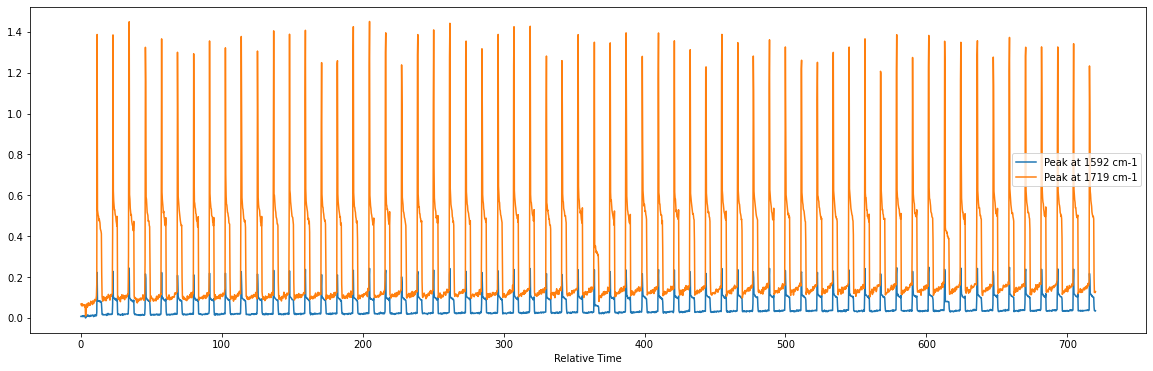

In [3]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# Useful list
methods = ['Prominence','Experimental Area','Fitted Area']

In [5]:
# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1592 cm-1', 'Peak at 1719 cm-1']


In [6]:
# Choose peak
peak_of_interest = 'Peak at 1592 cm-1'

In [7]:
# Instantiate class
peaks = Peaks(ir_data)

# Auto find prominence and height to match number of conditions
prominence, no_reactions = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, 62)

print('There are', no_reactions, 'reactions')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

There are 1 reactions
Prominence threshold = 0.0191
Height threshold = 1.0
Residence time = 1.59


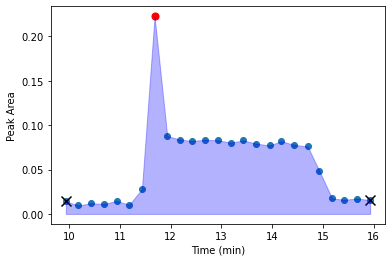

0


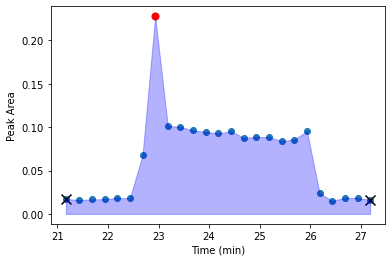

1


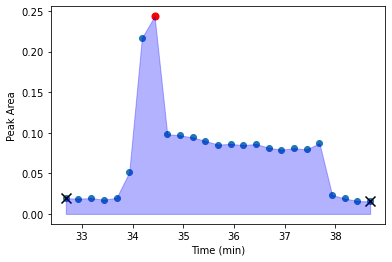

2


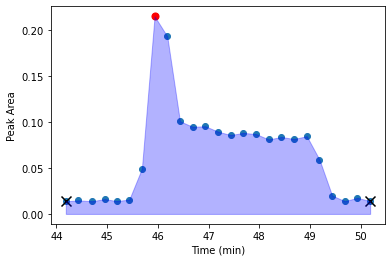

3


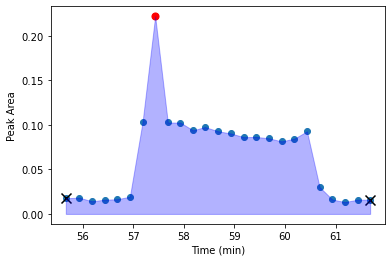

4


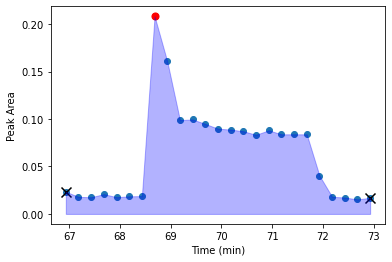

5


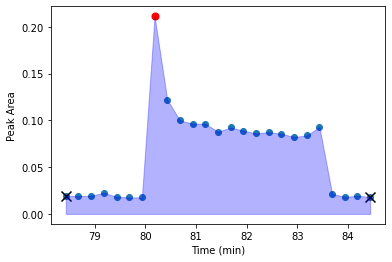

6


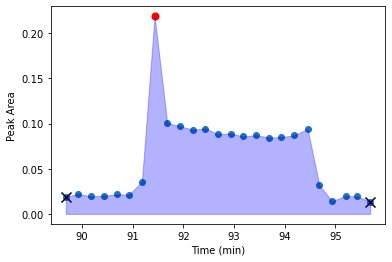

7


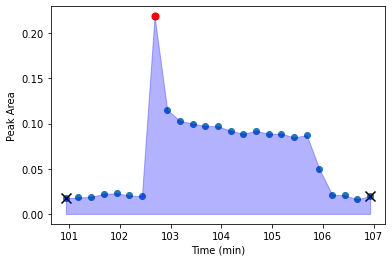

8


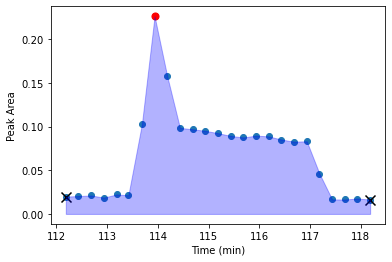

9


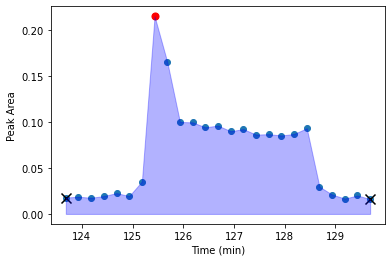

10


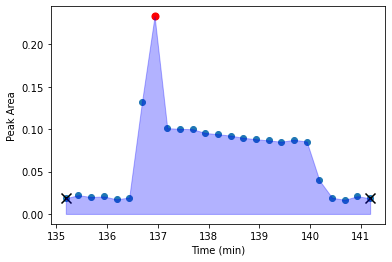

11


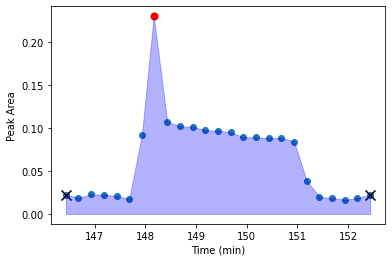

12


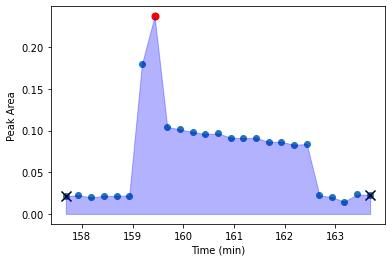

13


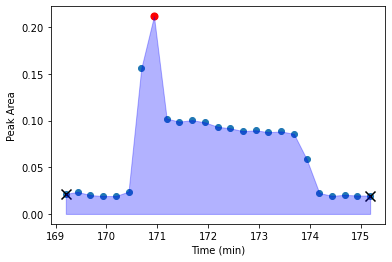

14


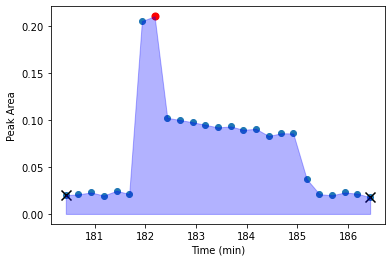

15


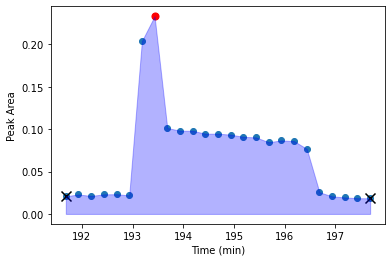

16


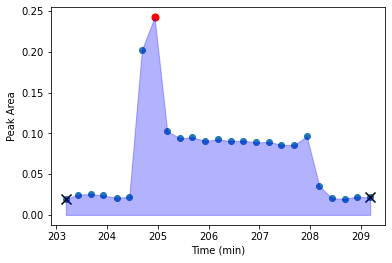

17


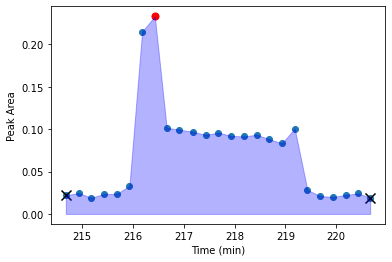

18


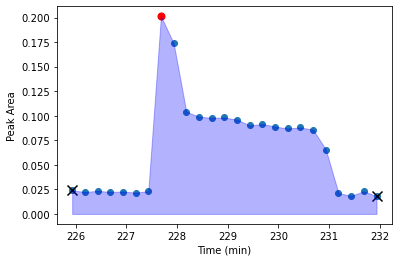

19


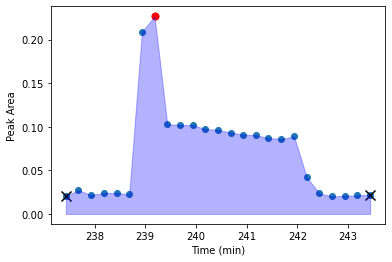

20


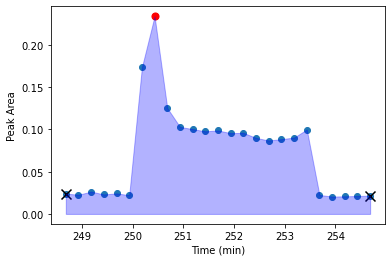

21


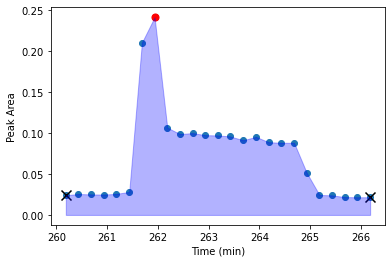

22


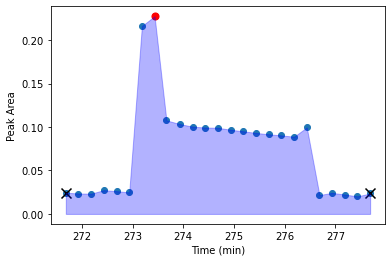

23


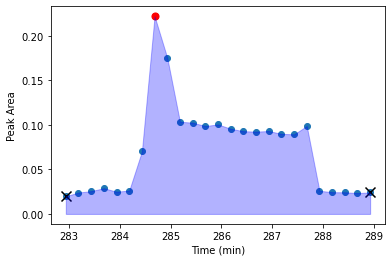

24


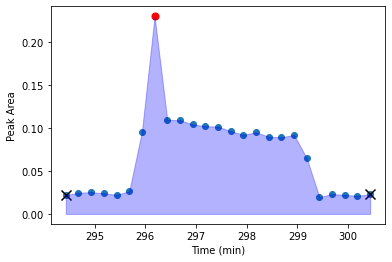

25


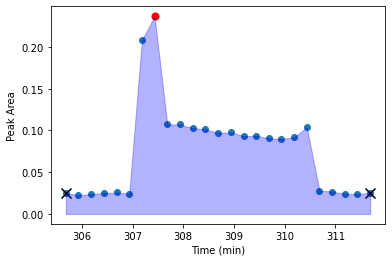

26


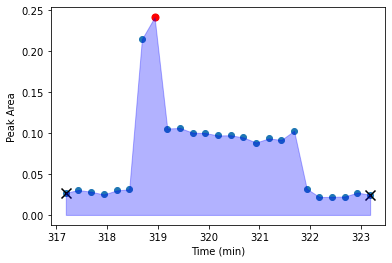

27


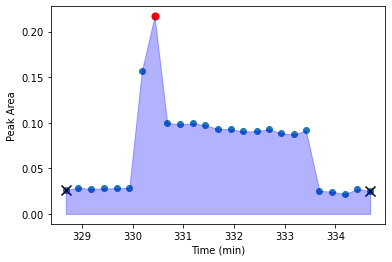

28


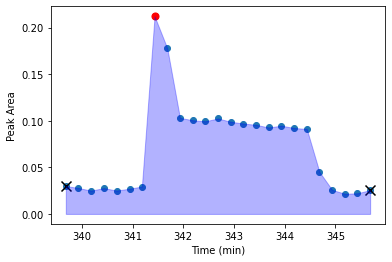

29


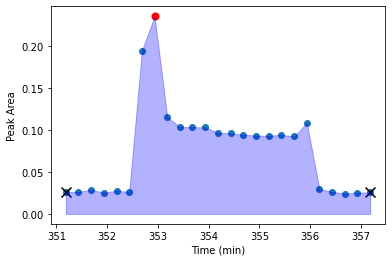

30


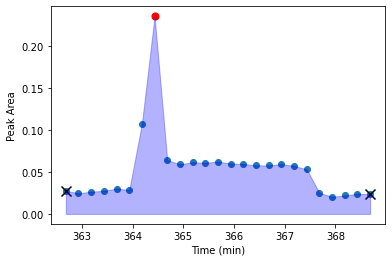

31


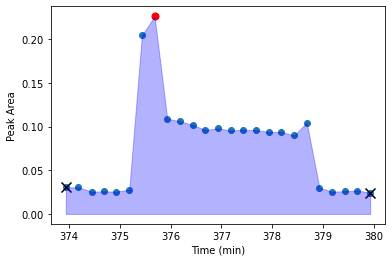

32


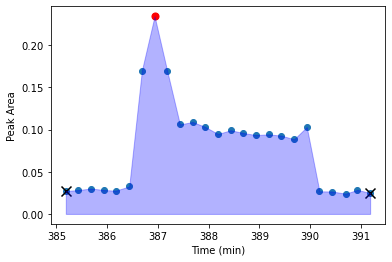

33


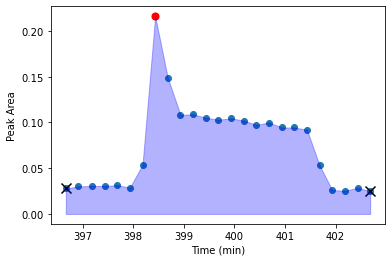

34


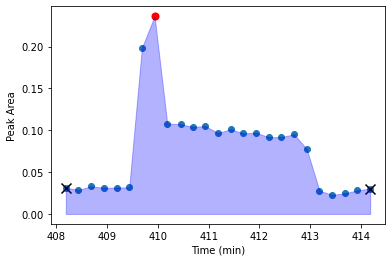

35


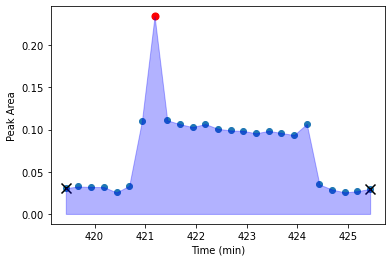

36


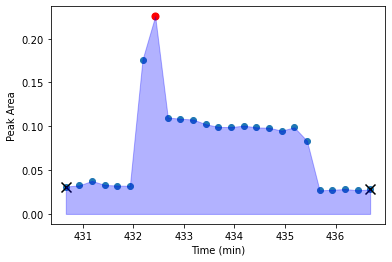

37


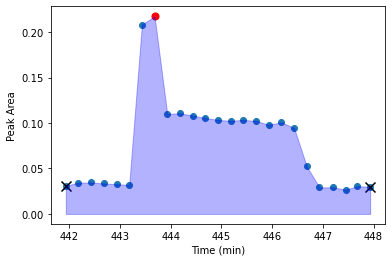

38


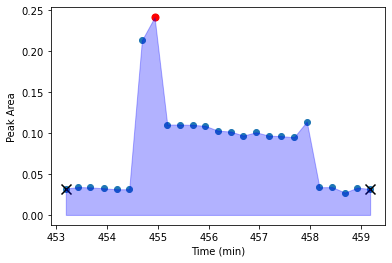

39


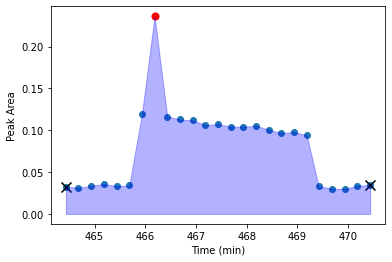

40


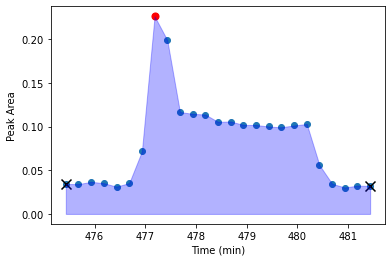

41


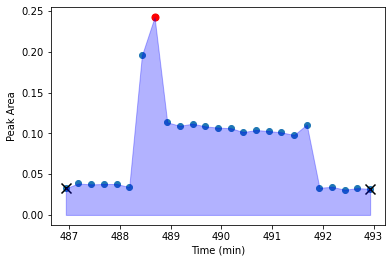

42


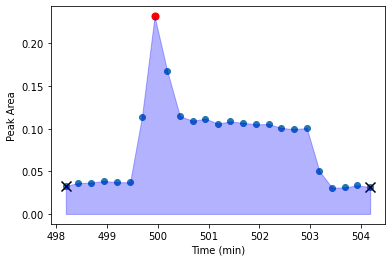

43


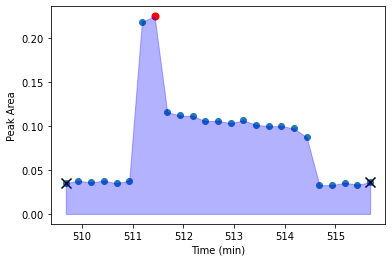

44


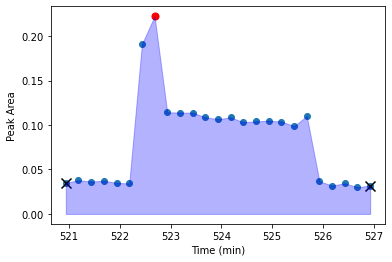

45


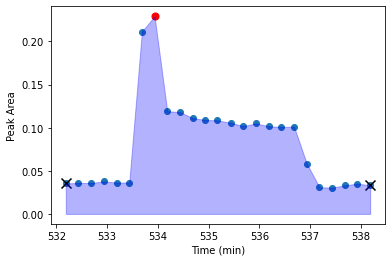

46


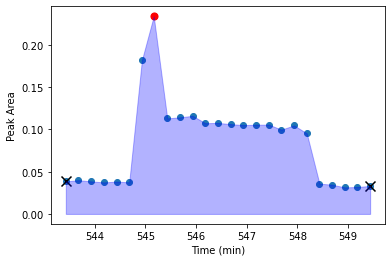

47


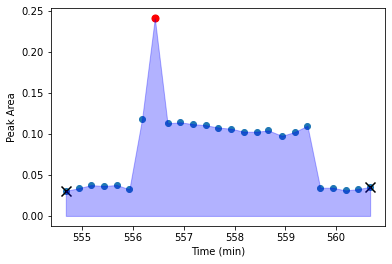

48


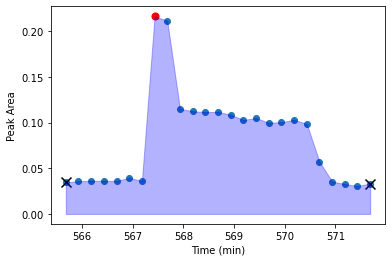

49


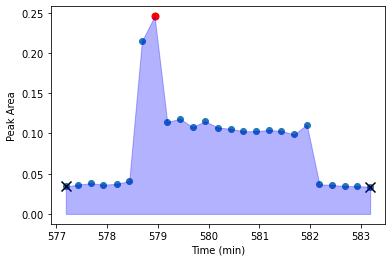

50


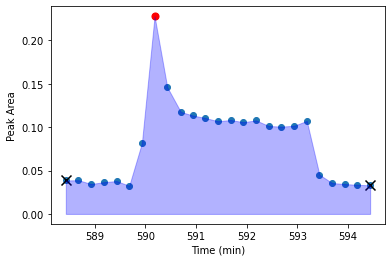

51


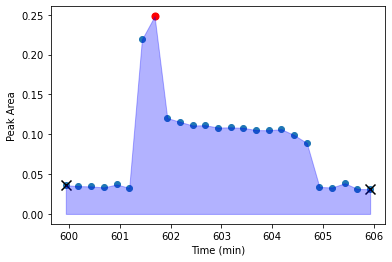

52


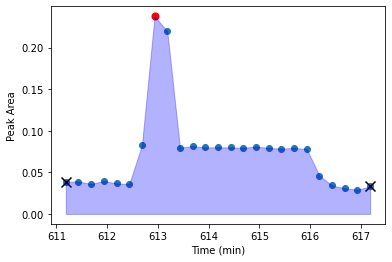

53


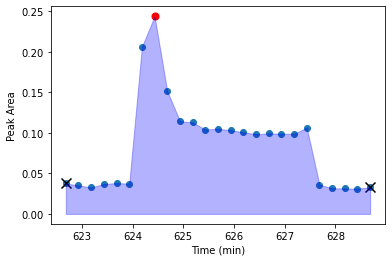

54


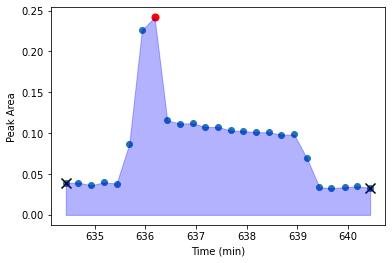

55


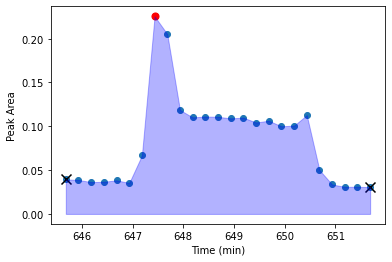

56


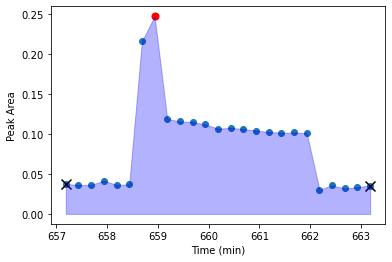

57


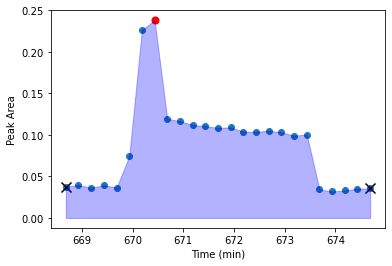

58


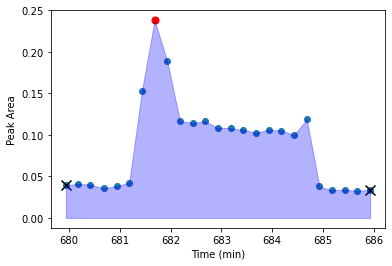

59


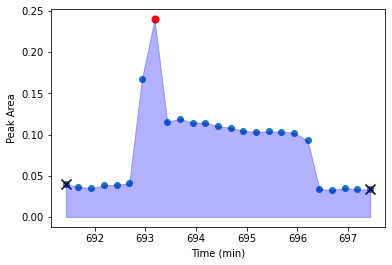

60


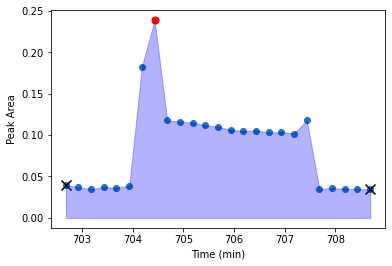

61


In [8]:
# Check area start/stop
for var in range(0, 62):
    peaks.exp_area_sp(prominence, residence_time, peak_of_interest, -1, 3.5, var)
    print(var)

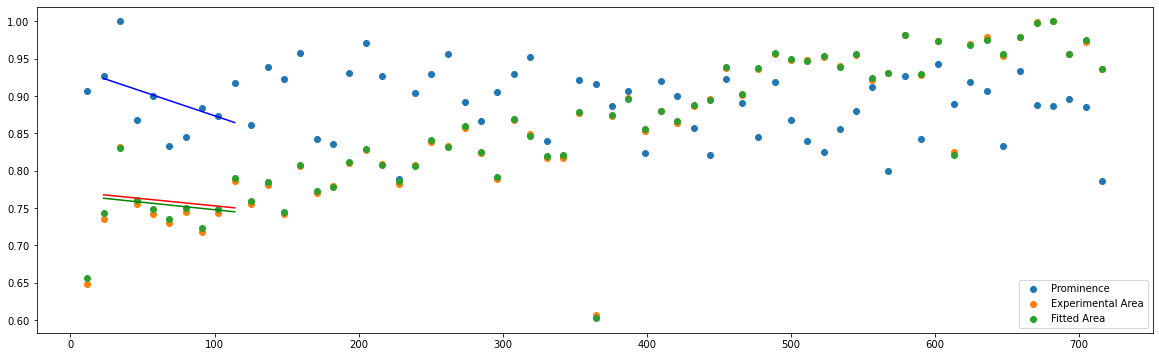

In [11]:
# Find peak properties
r2, compare_unprocessed = peaks.compare_no_height(prominence, residence_time, peak_of_interest, no_reactions, 10, -1, 3.5)

### Perform baseline correction

In [15]:
# Correct Baseline (if needed)
correction = Data.baseline_correction(ir_data[peak_of_interest])

ir_data[peak_of_interest] = ir_data[peak_of_interest] - correction

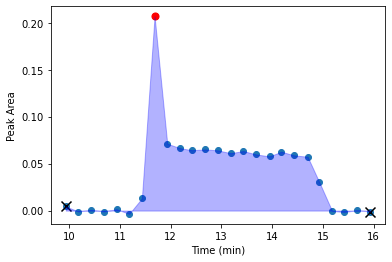

0


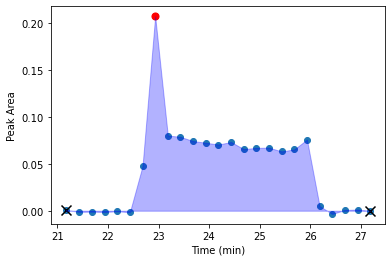

1


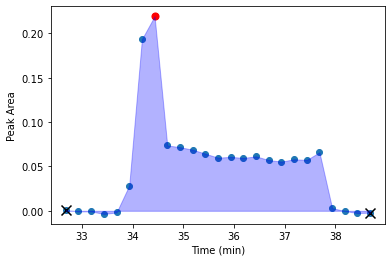

2


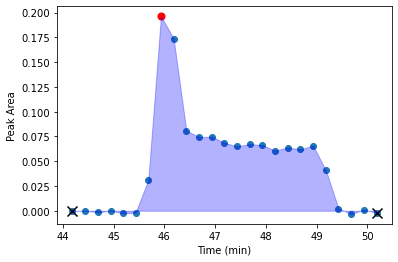

3


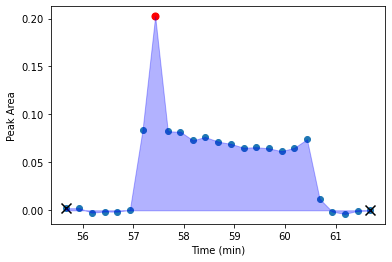

4


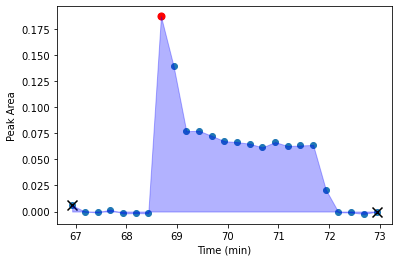

5


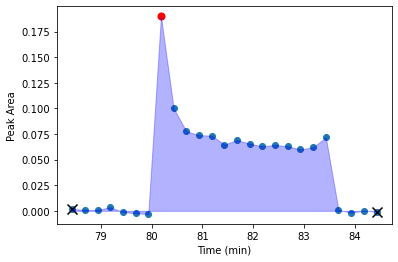

6


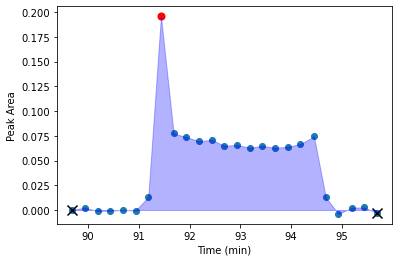

7


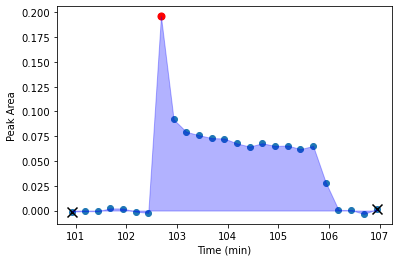

8


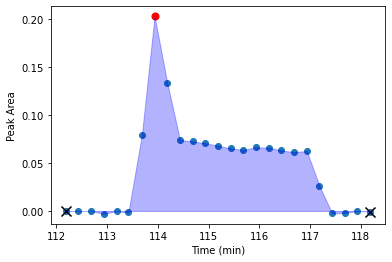

9


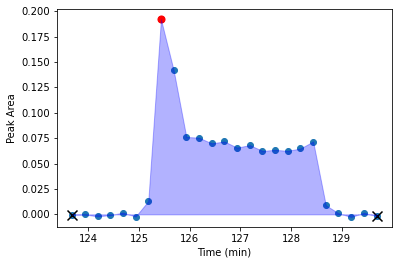

10


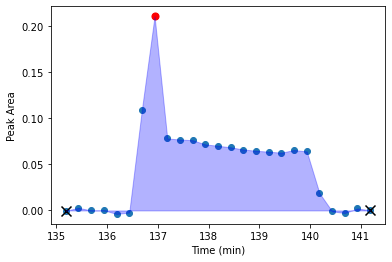

11


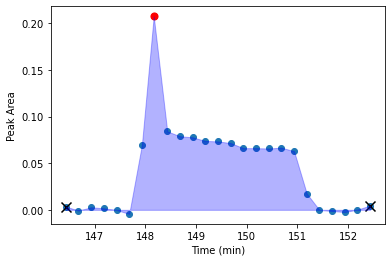

12


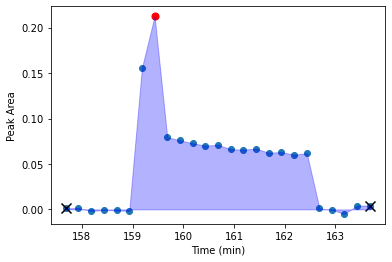

13


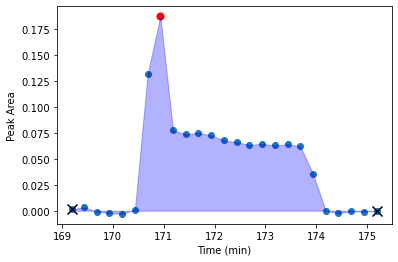

14


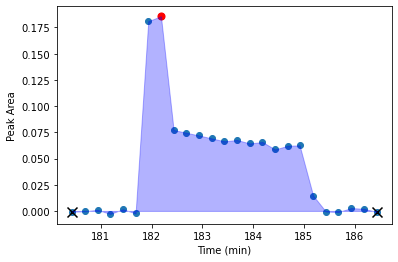

15


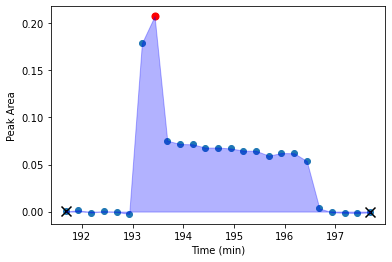

16


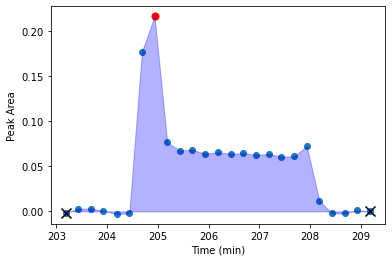

17


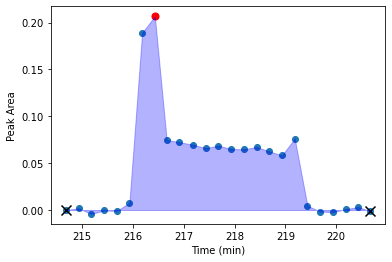

18


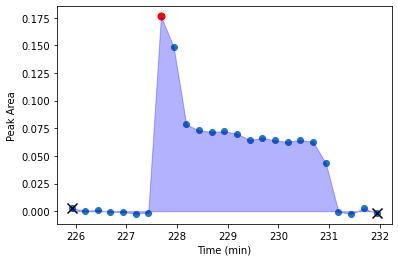

19


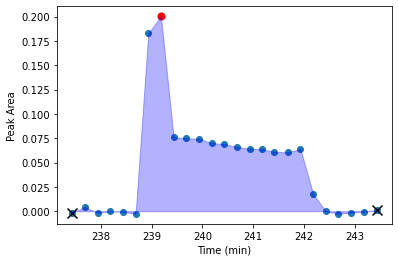

20


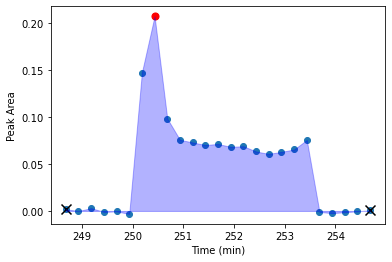

21


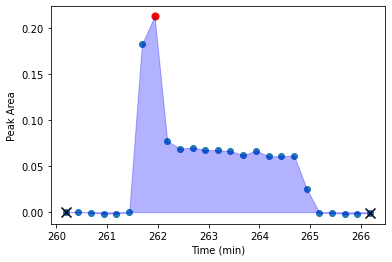

22


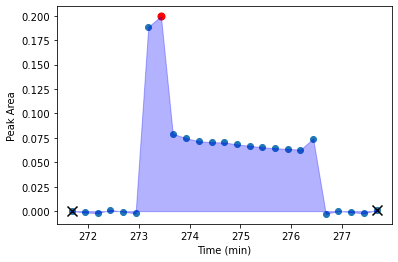

23


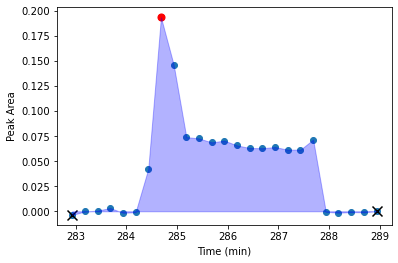

24


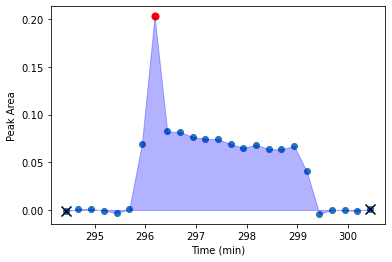

25


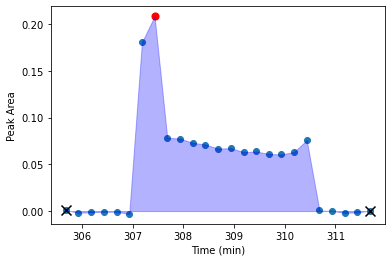

26


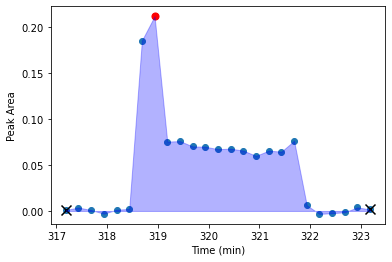

27


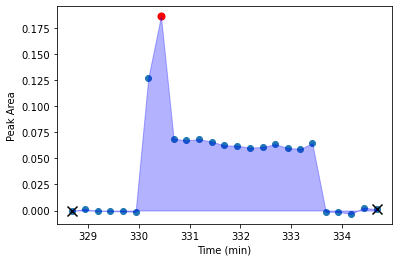

28


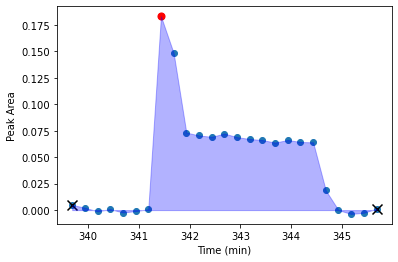

29


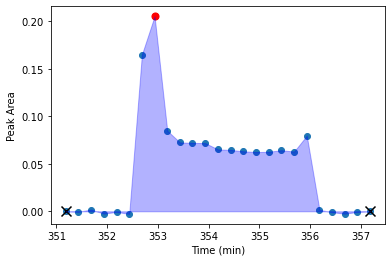

30


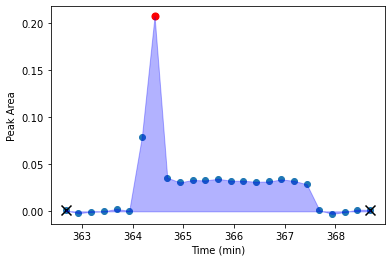

31


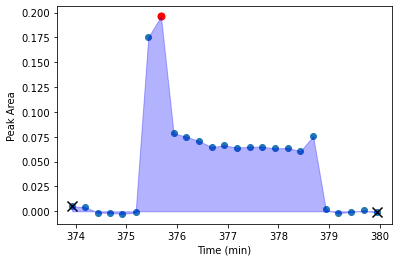

32


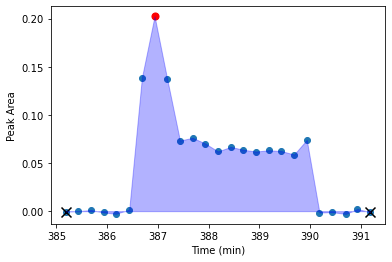

33


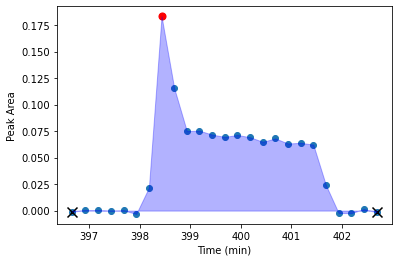

34


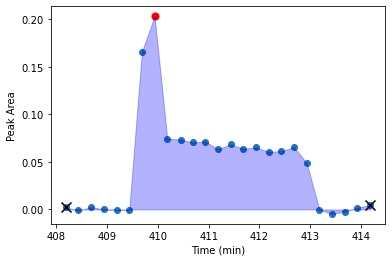

35


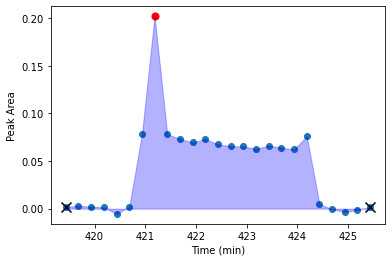

36


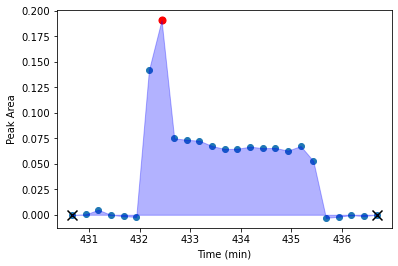

37


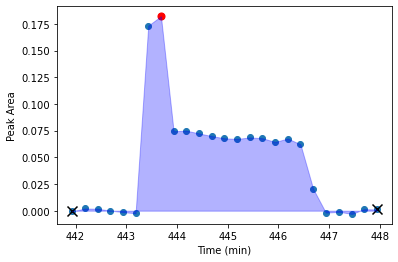

38


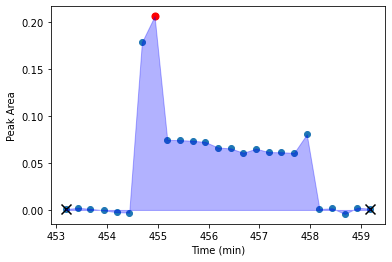

39


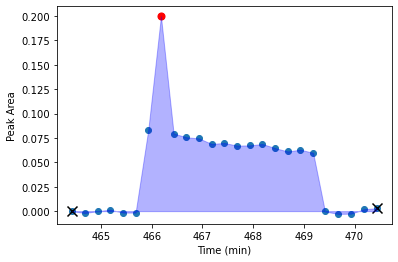

40


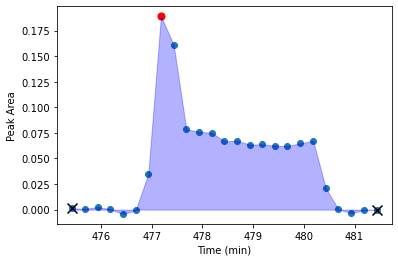

41


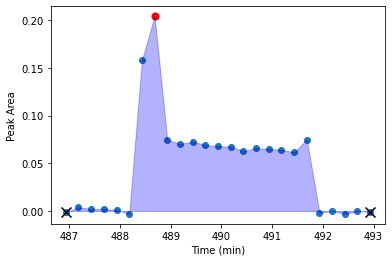

42


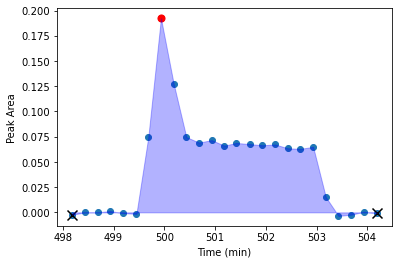

43


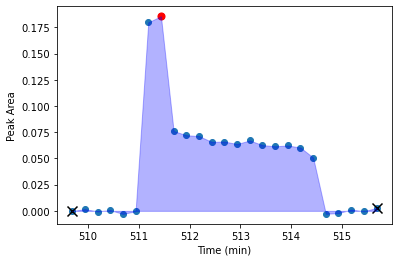

44


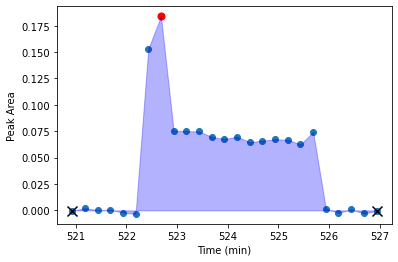

45


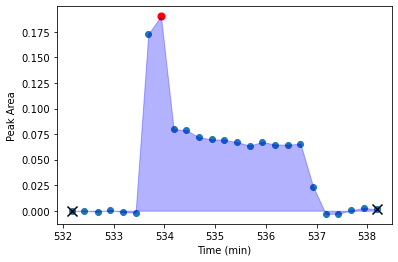

46


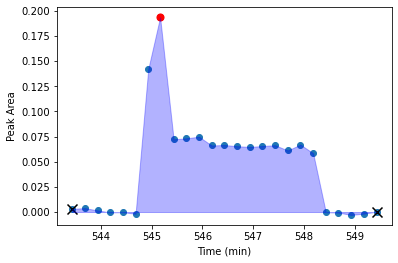

47


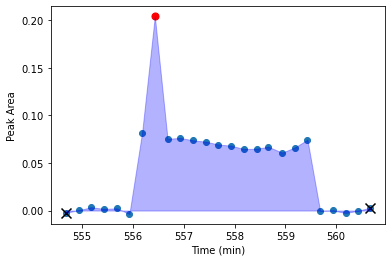

48


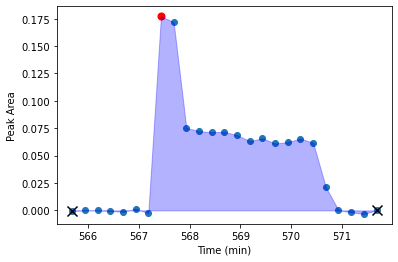

49


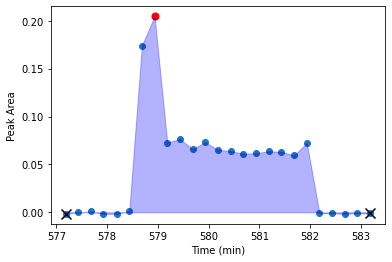

50


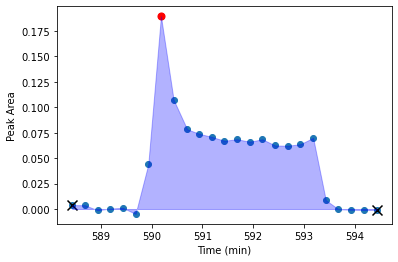

51


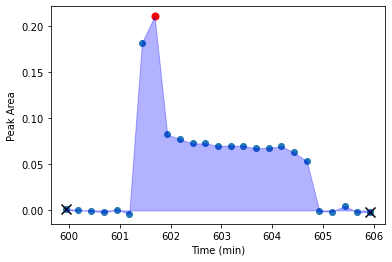

52


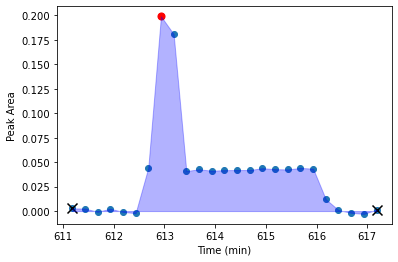

53


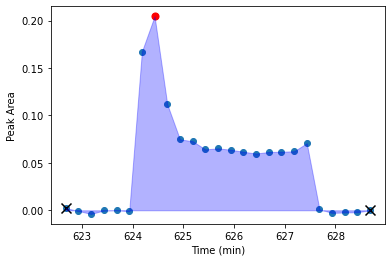

54


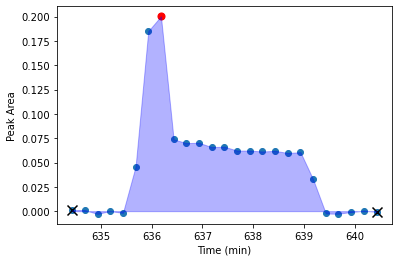

55


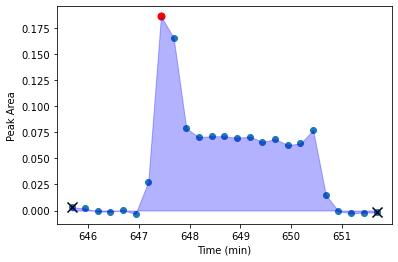

56


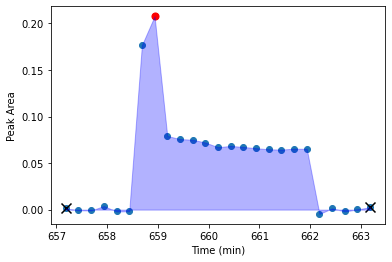

57


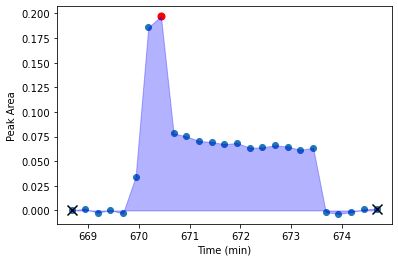

58


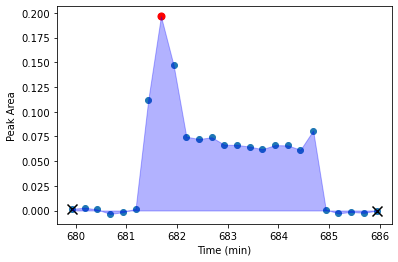

59


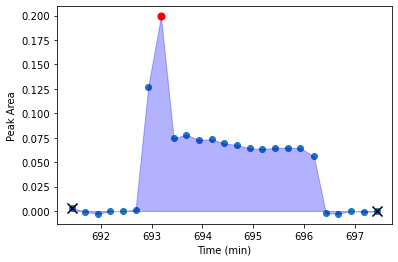

60


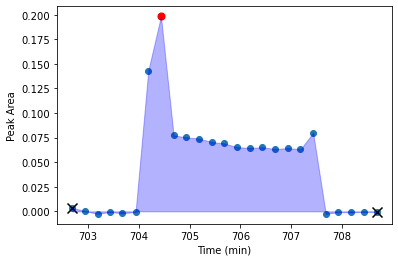

61


In [13]:
# Check area start/stop
for var in range(0, 62):
    peaks.exp_area_sp(prominence, residence_time, peak_of_interest, -1, 3.5, var)
    print(var)

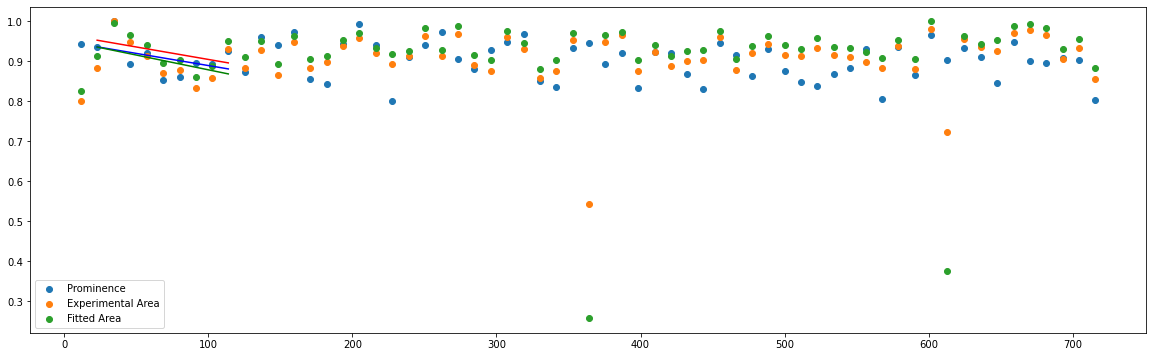

In [14]:
# Find peak properties
prominence = 0.02 # Needs to be a little higher now the baseline is different
r2, compare_baseline = peaks.compare_no_height(prominence, residence_time, peak_of_interest, no_reactions, 10,-1,3.5)

In [57]:
# There is one rogue datapoint (v low), remove it
compare_baseline.loc[compare_baseline['Fitted Area'] < 0.6, 'Fitted Area'] = np.nan

## Plot Data

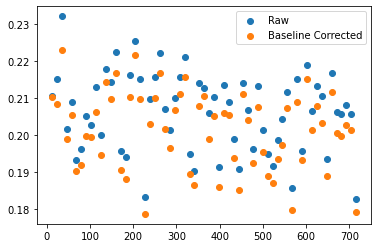

In [58]:
# Prominence w/wo baseline

plt.scatter(compare_unprocessed['Relative Time'], compare_unprocessed['Prominence'], label='Raw')
plt.scatter(compare_baseline['Relative Time'], compare_baseline['Prominence'], label='Baseline Corrected')
plt.legend()
plt.show()

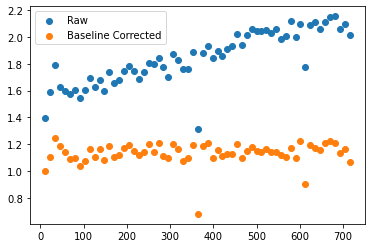

In [59]:
# Experimental Area w/wo Baseline

plt.scatter(compare_unprocessed['Relative Time'], compare_unprocessed['Experimental Area'], label='Raw')
plt.scatter(compare_baseline['Relative Time'], compare_baseline['Experimental Area'], label='Baseline Corrected')
plt.legend()
plt.show()

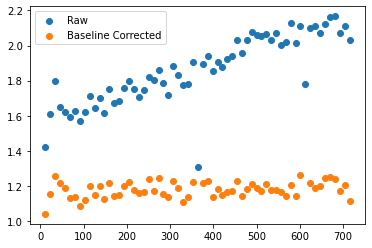

In [60]:
# Fitted Area w/wo Baseline

plt.scatter(compare_unprocessed['Relative Time'], compare_unprocessed['Fitted Area'], label='Raw')
plt.scatter(compare_baseline['Relative Time'], compare_baseline['Fitted Area'], label='Baseline Corrected')
plt.legend()
plt.show()

## Box Plot

Text(0.5, 1.0, 'Normalised')

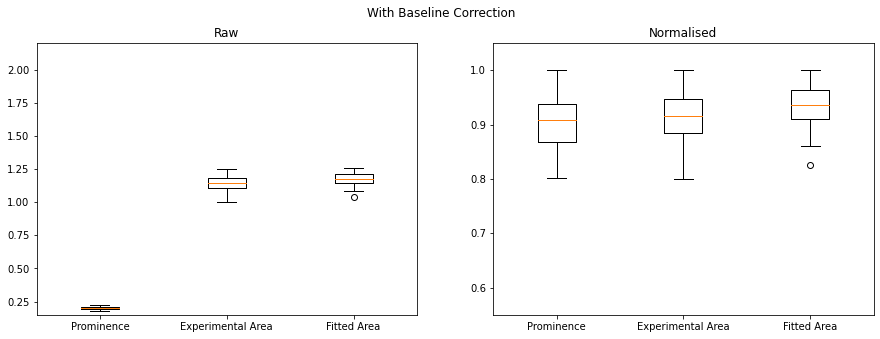

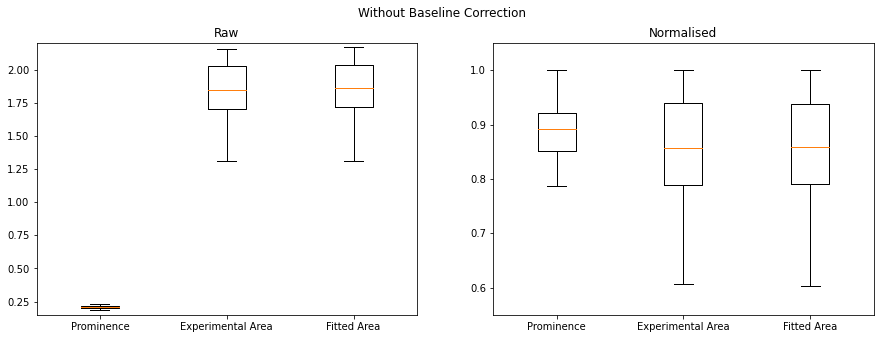

In [64]:
ylim1=(0.15,2.2)
ylim2=(0.55,1.05)

# With Baseline Correction
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('With Baseline Correction')

# Raw Data
ax1.boxplot(compare_baseline[methods].dropna())
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(methods)
ax1.set_ylim(ylim1)
ax1.set_title('Raw')

# Normalised Data
df =[]
for var in methods:
    tmp = compare_baseline[var]/compare_baseline[var].max()
    df.append(tmp)

norm_comp_unproc = pd.concat(df, axis=1)

ax2.boxplot(norm_comp_unproc[methods].dropna())
ax2.set_xticks([1,2,3])
ax2.set_xticklabels(methods)
ax2.set_ylim(ylim2)
ax2.set_title('Normalised')

# No Baseline Correction
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Without Baseline Correction')

# Raw Data
ax3.boxplot(compare_unprocessed[methods])
ax3.set_xticks([1,2,3])
ax3.set_xticklabels(methods)
ax3.set_ylim(ylim1)
ax3.set_title('Raw')

# Normalised Data
df =[]
for var in methods:
    tmp = compare_unprocessed[var]/compare_unprocessed[var].max()
    df.append(tmp)

norm_comp_unproc = pd.concat(df, axis=1)

ax4.boxplot(norm_comp_unproc[methods])
ax4.set_xticks([1,2,3])
ax4.set_xticklabels(methods)
ax4.set_ylim(ylim2)
ax4.set_title('Normalised')

Text(0.5, 1.0, 'Normalised')

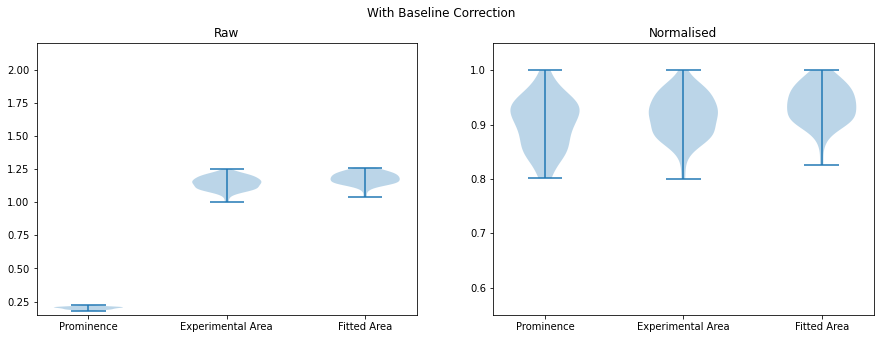

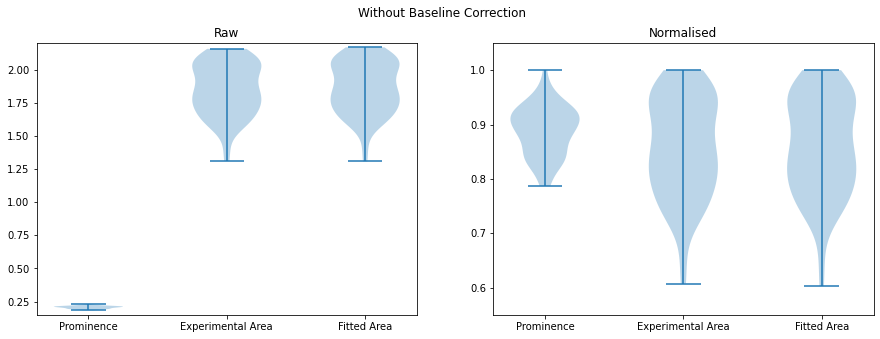

In [65]:
ylim1=(0.15,2.2)
ylim2=(0.55,1.05)

# With Baseline Correction
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('With Baseline Correction')

# Raw Data
ax1.violinplot(compare_baseline[methods].dropna())
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(methods)
ax1.set_ylim(ylim1)
ax1.set_title('Raw')

# Normalised Data
df =[]
for var in methods:
    tmp = compare_baseline[var]/compare_baseline[var].max()
    df.append(tmp)

norm_comp_unproc = pd.concat(df, axis=1)

ax2.violinplot(norm_comp_unproc[methods].dropna())
ax2.set_xticks([1,2,3])
ax2.set_xticklabels(methods)
ax2.set_ylim(ylim2)
ax2.set_title('Normalised')

# No Baseline Correction
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Without Baseline Correction')

# Raw Data
ax3.violinplot(compare_unprocessed[methods])
ax3.set_xticks([1,2,3])
ax3.set_xticklabels(methods)
ax3.set_ylim(ylim1)
ax3.set_title('Raw')

# Normalised Data
df =[]
for var in methods:
    tmp = compare_unprocessed[var]/compare_unprocessed[var].max()
    df.append(tmp)

norm_comp_unproc = pd.concat(df, axis=1)

ax4.violinplot(norm_comp_unproc[methods])
ax4.set_xticks([1,2,3])
ax4.set_xticklabels(methods)
ax4.set_ylim(ylim2)
ax4.set_title('Normalised')

## Find Std Dev

In [27]:
# Std dev summary

std_dev_unproc = (np.std(compare_unprocessed['Prominence']),
                  np.std(compare_unprocessed['Experimental Area']),
                  np.std(compare_unprocessed['Fitted Area']))

std_dev_proc = (np.std(compare_baseline['Prominence']),
                np.std(compare_baseline['Experimental Area']),
                np.std(compare_baseline['Fitted Area']))

summary = pd.DataFrame((std_dev_unproc,std_dev_proc), index=('Unprocessed','Baseline Corr'), columns=('Prominence','Exp Area','Fit Area'))
summary

,Prominence,Exp Area,Fit Area
Unprocessed,0.010630,0.195779,0.194025
Baseline Corr,0.010452,0.081114,0.044097


In [114]:
# First ten points are a bit dodgy, drop them

std_dev_unproc = (np.std(compare_unprocessed['Prominence'][10:]),
                  np.std(compare_unprocessed['Experimental Area'][10:]),
                  np.std(compare_unprocessed['Fitted Area'][10:]))

std_dev_proc = (np.std(compare_baseline['Prominence'][10:]),
                np.std(compare_baseline['Experimental Area'][10:]),
                np.std(compare_baseline['Fitted Area'][10:]))

summary_drop10 = pd.DataFrame((std_dev_unproc,std_dev_proc), index=('Unprocessed','Baseline Corr'), columns=('Prominence','Exp Area','Fit Area'))
summary_drop10

,Prominence,Exp Area,Fit Area
Unprocessed,0.010632,0.068037,0.077026
Baseline Corr,0.010645,0.083305,0.075553


## Find Coefficient of Variation

In [117]:
# Std dev summary

std_dev_unproc = (np.std(compare_unprocessed['Prominence'])*100/np.mean(compare_unprocessed['Prominence']),
                  np.std(compare_unprocessed['Experimental Area'])*100/np.mean(compare_unprocessed['Experimental Area']),
                  np.std(compare_unprocessed['Fitted Area'])*100/np.mean(compare_unprocessed['Fitted Area']))

std_dev_proc = (np.std(compare_baseline['Prominence'])*100/np.mean(compare_baseline['Prominence']),
                np.std(compare_baseline['Experimental Area'])*100/np.mean(compare_baseline['Experimental Area']),
                np.std(compare_baseline['Fitted Area'])*100/np.mean(compare_baseline['Fitted Area']))

summary = pd.DataFrame((std_dev_unproc,std_dev_proc), index=('Unprocessed','Baseline Corr'), columns=('Prominence','Exp Area','Fit Area'))
summary

,Prominence,Exp Area,Fit Area
Unprocessed,5.152276,12.169469,12.599948
Baseline Corr,5.191166,7.243009,6.599701


In [116]:
# First ten points are a bit dodgy, drop them

std_dev_unproc = (np.std(compare_unprocessed['Prominence'][10:])*100/np.mean(compare_unprocessed['Prominence'][10:]),
                  np.std(compare_unprocessed['Experimental Area'][10:])*100/np.mean(compare_unprocessed['Experimental Area'][10:]),
                  np.std(compare_unprocessed['Fitted Area'][10:])*100/np.mean(compare_unprocessed['Fitted Area'][10:]))

std_dev_proc = (np.std(compare_baseline['Prominence'][10:])*100/np.mean(compare_baseline['Prominence'][10:]),
                np.std(compare_baseline['Experimental Area'][10:])*100/np.mean(compare_baseline['Experimental Area'][10:]),
                np.std(compare_baseline['Fitted Area'][10:])*100/np.mean(compare_baseline['Fitted Area'][10:]))

summary_drop10 = pd.DataFrame((std_dev_unproc,std_dev_proc), index=('Unprocessed','Baseline Corr'), columns=('Prominence','Exp Area','Fit Area'))
summary_drop10

,Prominence,Exp Area,Fit Area
Unprocessed,5.160513,9.421841,10.421834
Baseline Corr,5.297427,7.336268,6.756864


## Find Linearity

In [18]:
# Unprocessed
df2 =[] 
for var in methods:
    df =[]
    # Find linear fit
    a, b = np.polyfit(compare_unprocessed['Relative Time'], compare_unprocessed[var].astype(float), 1)
    r2 = np.corrcoef(compare_unprocessed['Relative Time'], compare_unprocessed[var].astype(float), 1)
    df.append(a)
    df.append(r2[0,1])
    df2.append(df)

result = pd.DataFrame(df2, index=('Prominence','Exp Area','Fit Area'), columns=('Gradient','R2')).T
result

,Prominence,Exp Area,Fit Area
Gradient,-0.000011,0.000279,0.000287
R2,-0.204854,0.674599,0.654166


In [118]:
# Baseline correction

# Get rid of NaN
compare_baseline = compare_baseline.dropna()

df2 =[] 
for var in methods:
    df =[]
    # Find linear fit
    a, b = np.polyfit(compare_baseline['Relative Time'], compare_baseline[var].astype(float), 1)
    r2 = np.corrcoef(compare_baseline['Relative Time'], compare_baseline[var].astype(float), 1)
    df.append(a)
    df.append(r2[0,1])
    df2.append(df)

result_baseline = pd.DataFrame(df2, index=('Prominence','Exp Area','Fit Area'), columns=('Gradient','R2')).T
result_baseline

,Prominence,Exp Area,Fit Area
Gradient,-0.000012,0.000062,0.000055
R2,-0.226573,0.166238,0.152282
